In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mnist.nn_neural_network import NeuralNetwork
from mnist.nn_data_utils import DataUtils
from mnist.nn_metrics import Metrics
from mnist.nn_encoders import Encoders
from mnist.nn_activations import Activations

In [51]:
df = pd.read_csv('/home/kmaev/dev/ML_Rebelway_course/ml_course_homework/train.csv')

TRAINING:


In [52]:
neural_model = NeuralNetwork(df)
dataset = DataUtils(df)

In [53]:
X_train, X_test, y_train, y_test = dataset.train_test_split(df)

In [54]:
w1,b1,w2,b2 = neural_model.gradient_descent(X_train, y_train, 0.1, 1000) 


Epoch:  1
[4 8 6 ... 4 0 5] [0 9 9 ... 3 5 7]
0.063225
Epoch:  11
[6 8 8 ... 8 6 5] [0 9 9 ... 3 5 7]
0.09315
Epoch:  21
[6 8 8 ... 8 6 5] [0 9 9 ... 3 5 7]
0.11565
Epoch:  31
[6 8 8 ... 1 6 5] [0 9 9 ... 3 5 7]
0.19765
Epoch:  41
[6 8 8 ... 1 6 5] [0 9 9 ... 3 5 7]
0.234275
Epoch:  51
[6 8 8 ... 1 6 5] [0 9 9 ... 3 5 7]
0.26425
Epoch:  61
[6 8 5 ... 1 6 5] [0 9 9 ... 3 5 7]
0.298925
Epoch:  71
[0 8 5 ... 1 4 5] [0 9 9 ... 3 5 7]
0.335625
Epoch:  81
[0 3 5 ... 3 4 5] [0 9 9 ... 3 5 7]
0.372875
Epoch:  91
[0 7 5 ... 3 4 5] [0 9 9 ... 3 5 7]
0.3986
Epoch:  101
[0 7 5 ... 3 9 5] [0 9 9 ... 3 5 7]
0.424625
Epoch:  111
[0 7 9 ... 3 9 5] [0 9 9 ... 3 5 7]
0.449275
Epoch:  121
[0 7 9 ... 3 9 7] [0 9 9 ... 3 5 7]
0.47315
Epoch:  131
[6 7 9 ... 3 9 7] [0 9 9 ... 3 5 7]
0.492575
Epoch:  141
[6 7 9 ... 3 9 7] [0 9 9 ... 3 5 7]
0.50945
Epoch:  151
[6 7 9 ... 3 9 7] [0 9 9 ... 3 5 7]
0.526
Epoch:  161
[6 7 9 ... 3 9 7] [0 9 9 ... 3 5 7]
0.5393
Epoch:  171
[6 7 9 ... 3 5 7] [0 9 9 ... 3 5 7]
0.55335

In [55]:
weights = (w1, b1, w2, b2) # Initialising weights to save

In [56]:
#print(w1) #Comparing weights
print("_______________")
#print(weights[1])

_______________


In [57]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = neural_model.forward(W1, b1, W2, b2, X)

    predictions = neural_model.get_predictions(A2)
    return predictions

In [90]:
def test_prediction(image, W1, b1, W2, b2):
    prediction = make_predictions(image, W1, b1, W2, b2)
    return prediction
    

Prediction:  [1]
Label:  1


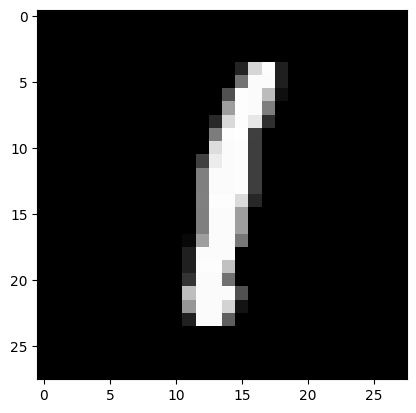

In [91]:
index =1 
current_image = X_test[:, index, None]
label = y_test[index]
print("Prediction: ", test_prediction(current_image, weights[0],weights[1], weights[2], weights[3])) #Testing prediction, with updated weights 
print("Label: ", label)
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()


Saving Weights:

In [60]:
import pickle

In [61]:
filename = "finalised_model_06.sav" 
pickle.dump(weights, open(filename, "wb"))

TESTING A MODEL WITH IMPORTED WEIGHTS ON DATASET

In [62]:
with open('/home/kmaev/dev/ML_Rebelway_course/ml_course_homework/finalised_model_06.sav', 'rb') as file:
    i_weights = pickle.load(file)

Prediction:  [3]
Label:  3


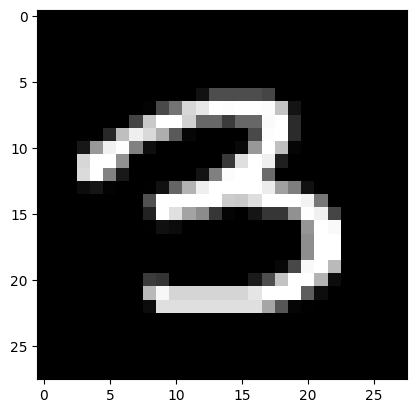

In [93]:
index =2 
current_image = X_test[:, index, None]
label = y_test[index]
print("Prediction: ", test_prediction(current_image, i_weights[0],i_weights[1], i_weights[2], i_weights[3])) #Testing prediction, with updated weights 
print("Label: ", label)
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()


__________________________________________________________
Testing a model with an exported NumPy array from Houdini: 

In [94]:
color_array = np.load("file_test.npy")

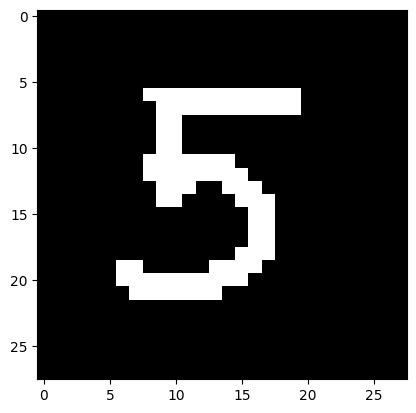

In [95]:
current_image = color_array.reshape((28, 28)) * 255 #Plotting imported NumPy array
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  [5]


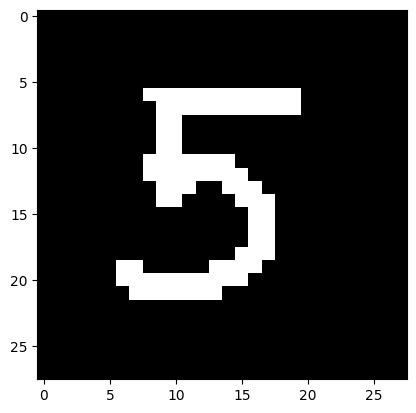

In [98]:

print("Prediction: ", test_prediction(color_array,i_weights[0],i_weights[1], i_weights[2], i_weights[3]))
current_image = color_array.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Testing a model with an exported texture from Houdini: 

Prediction:  [2]


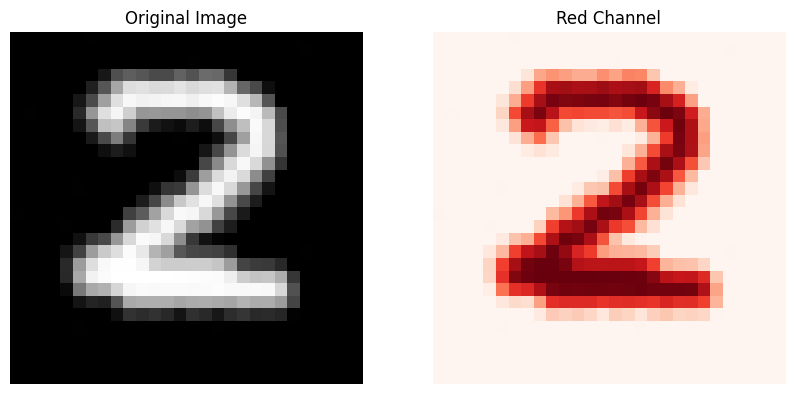

In [103]:
import cv2
hou_image = '/home/kmaev/dev/ML_Rebelway_course/ml_course_homework/render/mnist_hda2_basecolor.jpg'

image = cv2.imread(hou_image)

red_channel = image[:, :, 2]  
red_channel_resized = cv2.resize(red_channel, (1, 784))
red_channel_vector = red_channel_resized.reshape(-1, 1)

print("Prediction: ", test_prediction(red_channel_vector,i_weights[0],i_weights[1], i_weights[2], i_weights[3]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Display the red channel
plt.subplot(1, 2, 2)
plt.title('Red Channel')
plt.imshow(red_channel, cmap='Reds')
plt.axis('off')

plt.show()